In [4]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import esm

# takes FASTA files and generates dataframe and csv with descriptions and features

In [45]:
df = pd.read_csv("seq_df_first_10000_less_1000.csv", index_col=0).dropna()
cols = list(df.columns)

In [ ]:
sort_feature = "GRAVY"
assert sort_feature in cols, "Feature not in df.columns"
df = df.sort_values(by=sort_feature, ascending=False)
df = df[df["Length"] < 500]

In [51]:
df

,Sequence,Name,Description,Length,Num_Features,Molecular Weight,Aromaticity,Instability Index,Flexibility,GRAVY,Isoelectric Point,Charge at pH:7.0
ID,,,,,,,,,,,,
UniRef50_UPI0023E77DCC,MCVVCGVFCMWCVVCVYFVCGGYCVCGVYVAYFVCGVWCILYVVCG...,UniRef50_UPI0023E77DCC,UniRef50_UPI0023E77DCC cytochrome c oxidase su...,387,0,42969.7412,0.196382,12.550646,"[0.9619166666666666, 0.922952380952381, 0.9354...",2.273385,7.558301,2.829080
UniRef50_UPI0037422E0A,MVSNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVGNAIIGIVGNAI...,UniRef50_UPI0037422E0A,UniRef50_UPI0037422E0A A-kinase anchor protein...,392,0,38139.0669,0.000000,-19.473724,"[0.9700833333333333, 0.9729047619047618, 0.991...",1.687500,4.050028,-19.390066
UniRef50_A0A5K1CRL5,MAKTAFLFSLSLLLLT,UniRef50_A0A5K1CRL5,UniRef50_A0A5K1CRL5 Uncharacterized protein (F...,16,0,1769.1950,0.125000,17.087500,"[0.9660833333333333, 0.9730833333333334, 0.962...",1.687500,8.500108,0.499356
UniRef50_A0A812DJF2,MWVIAGRPMWVIAGRPMWVIAGRPMWVIPGRPMCVIAGRPMWVIAG...,UniRef50_A0A812DJF2,UniRef50_A0A812DJF2 Uncharacterized protein n=...,323,0,39218.4060,0.365325,25.003127,"[0.9836547619047619, 0.9785357142857143, 0.993...",1.531579,9.557132,4.749784
UniRef50_A0A812DVB7,MIYHFCFHFNSAIFFLSLLLSSLFLSFYFSYAFPIHFLFFFILSFF...,UniRef50_A0A812DVB7,UniRef50_A0A812DVB7 Uncharacterized protein n=...,344,0,41555.0557,0.351744,36.572442,"[0.9246547619047618, 0.9314047619047618, 0.946...",1.447384,7.534770,1.545642
...,...,...,...,...,...,...,...,...,...,...,...,...
UniRef50_A0A8C7MWL0,MKNDRQRQTAPDRARQRQTGPDRARQRQTEPDRDRQRQGQTGPDRA...,UniRef50_A0A8C7MWL0,UniRef50_A0A8C7MWL0 Uncharacterized protein n=...,432,0,50544.0570,0.000000,67.004861,"[1.0391190476190477, 1.024345238095238, 1.0280...",-2.260648,11.469844,25.703672
UniRef50_A0AAZ3RTF0,HRGHNKDQHRGHRGHKDIEDITKINIEDITKIYIEDIEDITKTNRG...,UniRef50_A0AAZ3RTF0,UniRef50_A0AAZ3RTF0 Uncharacterized protein n=...,393,0,47289.5918,0.010178,73.126209,"[1.0382500000000001, 1.028535714285714, 1.0277...",-2.298219,10.188857,38.249840
UniRef50_UPI00200983D7,MAVLLNGNGKDDGLKGDDDGPKGDDDGQRENDDGPRGNDDGPKEDD...,UniRef50_UPI00200983D7,UniRef50_UPI00200983D7 S-antigen protein-like ...,401,0,41294.0079,0.002494,4.868329,"[1.003845238095238, 0.9995476190476191, 1.0229...",-2.385786,4.050028,-101.246152


### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of GRAVY values')

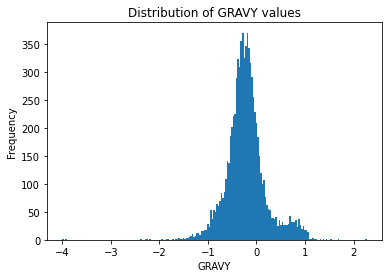

In [52]:
plt.hist(df["GRAVY"], bins=200)
plt.xlabel("GRAVY")
plt.ylabel("Frequency")
plt.title("Distribution of GRAVY values")

Text(0.5, 1.0, 'Distribution of Aromaticity values')

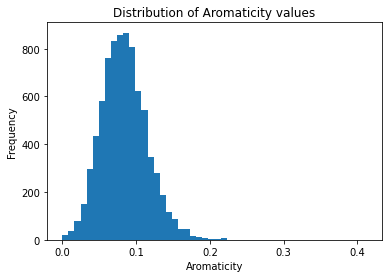

In [53]:
plt.hist(df["Aromaticity"], bins=50)
plt.xlabel("Aromaticity")
plt.ylabel("Frequency")
plt.title("Distribution of Aromaticity values")

Text(0.5, 1.0, 'Distribution of MW values')

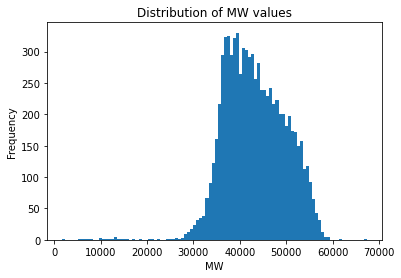

In [54]:
plt.hist(df["Molecular Weight"], bins=100)
plt.xlabel("MW")
plt.ylabel("Frequency")
plt.title("Distribution of MW values")

Text(0.5, 1.0, 'Distribution of Charge at pH:7.0 values')

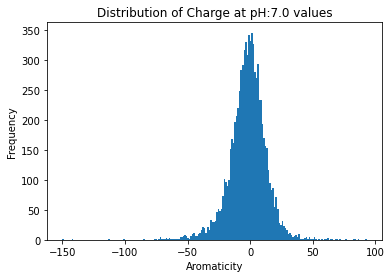

In [55]:
plt.hist(df["Charge at pH:7.0"], bins=200)
plt.xlabel("Aromaticity")
plt.ylabel("Frequency")
plt.title("Distribution of Charge at pH:7.0 values")

### Analyze Model Weights

In [56]:
# Load ESM-2 model
model, alphabet = esm.pretrained.esm2_t6_8M_UR50D()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

ESM2(
  (embed_tokens): Embedding(33, 320, padding_idx=1)
  (layers): ModuleList(
    (0): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=320, out_features=320, bias=True)
        (v_proj): Linear(in_features=320, out_features=320, bias=True)
        (q_proj): Linear(in_features=320, out_features=320, bias=True)
        (out_proj): Linear(in_features=320, out_features=320, bias=True)
        (rot_emb): RotaryEmbedding()
      )
      (self_attn_layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
      (fc1): Linear(in_features=320, out_features=1280, bias=True)
      (fc2): Linear(in_features=1280, out_features=320, bias=True)
      (final_layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (1): TransformerLayer(
      (self_attn): MultiheadAttention(
        (k_proj): Linear(in_features=320, out_features=320, bias=True)
        (v_proj): Linear(in_features=320, out_features=320, bias=True)
        (

In [57]:
def get_features(data, model):    
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)

    # Extract per-residue representations (on CPU)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[6], return_contacts=True)
    token_representations = results["representations"][6]
    # Generate per-sequence representations via averaging
    # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
    sequence_representations = []
    for i, tokens_len in enumerate(batch_lens):
        sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0).numpy())
    results['sequence_representations'] = np.array(sequence_representations)
    # Look at the unsupervised self-attention map contact predictions
    # import matplotlib.pyplot as plt
    # for (_, seq), tokens_len, attention_contacts in zip(data, batch_lens, results["contacts"]):
    #     plt.matshow(attention_contacts[: tokens_len, : tokens_len])
    #     plt.title(seq[:10] + "...")
    #     plt.colorbar()
    #     plt.show()    
    return results

In [58]:
def get_representations(data, model, layers=[6]):
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)

    # Extract per-residue representations (on CPU)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[6], return_contacts=True)
    token_representations = results["representations"][6]
    # Generate per-sequence representations via averaging
    # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.
    sequence_representations = []
    for i, tokens_len in enumerate(batch_lens):
        sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0))
    results['sequence_representations'] = sequence_representations
    return token_representations

In [59]:
top_gravy = df.iloc[:20]
low_gravy = df.iloc[-20:]

top_gravy_X = [(top_gravy.iloc[i]["Name"], top_gravy.iloc[i]["Sequence"]) for i in range(len(top_gravy))]
low_gravy_X = [(low_gravy.iloc[i]["Name"], low_gravy.iloc[i]["Sequence"]) for i in range(len(low_gravy))]
top_gravy_X, low_gravy_X

([('UniRef50_UPI0023E77DCC',
   'MCVVCGVFCMWCVVCVYFVCGGYCVCGVYVAYFVCGVWCILYVVCGMCVFCVWCALFVSHILCIVCGVCVACGVWCILCVVCVGCGVSIFSCVVCVRCVVCIYFVFGVHCVCGVCVVYFVCGVWYVCGVWCILCVVCGVFCVWHVWCVVCVVCGVFRVWCILCVVCVVYFVCGVWCISCVVYFVYSVCGVFCVWCVVYFVCGVFCVGVFCVWCVVYFMCGVFCVWRVWCILCVVCGVFCVQCVWCILRVVYVACGVWCVVYSVCGVFCVWCVVYFVCGVCGVFCVWCISCVVYFVCGVCDVFCVWCILCVVCVVYLVCGVWCISCVVYFVCGVCCILCVVCGVFRVWCILCVVCVVYFVCGVCGVFCVWYVVYFVCGVCMWCAAYGV'),
  ('UniRef50_UPI0037422E0A',
   'MVSNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVGNAIIGIVGNAIIGIVDNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVDNAIIGIVGNAIIGIVSNAIIGIVGNAIIGIVGNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVGNAIIGIVGNAIIGIMDNAIIGIVSNAIIGIVGNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVGNAIIGIMDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVDNAIIGIVSNAIIGIVGNAIIDTVGIVLSPSVRALIIH'),
  ('UniRef50_A0A5K1CRL5', 'MAKTAFLFSLSLLLLT'),
  ('UniRef50_A0A812DJF2',
   'MWVIAGRPMWVIAGRPMWVIAGRPMWVIPGRPMCVIAGRPMWVIAGRPIRIFVFSLFALHFFLSFFLSFF

In [60]:
top_gravy_results = get_features(top_gravy_X, model)
low_gravy_results = get_features(low_gravy_X, model)

In [64]:
res = dict(top_gravy_results)
print(res.keys())
res_2 = dict(low_gravy_results)
print(res_2.keys())

dict_keys(['logits', 'representations', 'attentions', 'contacts', 'sequence_representations'])
dict_keys(['logits', 'representations', 'attentions', 'contacts', 'sequence_representations'])


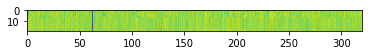

In [65]:
sr = res['sequence_representations']
plt.imshow(sr)

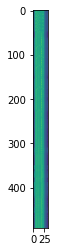

In [18]:
# logits
plt.imshow(res['logits'][3])

In [22]:
res['representations'].keys()

dict_keys([1, 2, 4, 6])

In [19]:
# attentions
res['attentions'].shape

torch.Size([10, 6, 20, 491, 491])

In [ ]:
# Assume this tensor: (batch, layers, heads, seq_len, seq_len)
attn = res['attentions']  # Shape: [3, 6, 20, 190, 190]

sequence_idx = 0  # pick which sequence to visualize
heads_to_plot = [0, 1, 2, 3, 4]  # pick a few heads
num_layers = attn.shape[1]

for layer in range(num_layers):
    fig, axes = plt.subplots(1, len(heads_to_plot), figsize=(15, 5))
    fig.suptitle(f"Sequence {sequence_idx}, Layer {layer}")
    
    for i, head in enumerate(heads_to_plot):
        ax = axes[i]
        ax.imshow(attn[sequence_idx, layer, head].cpu().numpy(), cmap='viridis')
        ax.set_title(f"Head {head}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Shape: [batch, layers, heads, seq_len, seq_len]
attn = res['attentions']
sequence_idx = 0  # pick which sequence to visualize
num_layers = attn.shape[1]
num_heads = attn.shape[2]

for layer in range(num_layers):
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for 20 heads
    fig.suptitle(f"Attention Heads — Sequence {sequence_idx}, Layer {layer}", fontsize=16)
    axes = axes.flatten()

    for head in range(num_heads):
        ax = axes[head]
        ax.imshow(attn[sequence_idx, layer, head].cpu().numpy(), cmap='viridis')
        ax.set_title(f"Head {head}")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the title
    plt.show()


In [ ]:
# Mean over batch → shape: [layers, heads, seq_len, seq_len]
attn = res['attentions'].mean(dim=0)

num_layers = attn.shape[0]
num_heads = attn.shape[1]

for layer in range(num_layers):
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for 20 heads
    fig.suptitle(f"Mean Attention Across Batch — Layer {layer}", fontsize=16)
    axes = axes.flatten()

    for head in range(num_heads):
        ax = axes[head]
        ax.imshow(attn[layer, head].cpu().numpy(), cmap='viridis')
        ax.set_title(f"Head {head}")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
# Mean over batch → shape: [layers, heads, seq_len, seq_len]
attn = res_2['attentions'].mean(dim=0)

num_layers = attn.shape[0]
num_heads = attn.shape[1]

for layer in range(num_layers):
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # 4x5 grid for 20 heads
    fig.suptitle(f"Mean Attention Across Batch — Layer {layer}", fontsize=16)
    axes = axes.flatten()

    for head in range(num_heads):
        ax = axes[head]
        ax.imshow(attn[layer, head].cpu().numpy(), cmap='viridis')
        ax.set_title(f"Head {head}")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [ ]:
attn = res["attentions"].mean(dim=0)  # shape: [layers, heads, seq_len, seq_len]

summary = []

for layer in range(attn.shape[0]):
    for head in range(attn.shape[1]):
        matrix = attn[layer, head]
        norm = torch.norm(matrix).item()
        min_val = matrix.min().item()
        max_val = matrix.max().item()
        summary.append({
            "layer": layer,
            "head": head,
            "norm": round(norm, 4),
            "min": round(min_val, 4),
            "max": round(max_val, 4)
        })

# Print a nice table
df_1 = pd.DataFrame(summary)


In [ ]:
attn = res_2["attentions"].mean(dim=0)  # shape: [layers, heads, seq_len, seq_len]

summary = []

for layer in range(attn.shape[0]):
    for head in range(attn.shape[1]):
        matrix = attn[layer, head]
        norm = torch.norm(matrix).item()
        min_val = matrix.min().item()
        max_val = matrix.max().item()
        summary.append({
            "layer": layer,
            "head": head,
            "norm": round(norm, 4),
            "min": round(min_val, 4),
            "max": round(max_val, 4)
        })

# Print a nice table
df_2 = pd.DataFrame(summary)


In [ ]:
(df_1 - df_2).sort_values("norm", ascending=False).head(20)

In [ ]:
res['contacts'].shape

In [ ]:
f, axarr = plt.subplots(1, 2, figsize=(20, 10))

criterion = "Molecular Weight"

# Compute mean contact maps once
mean_contact_1 = np.mean(res['contacts'].numpy(), axis=0) ** 0.5
mean_contact_2 = np.mean(res_2['contacts'].numpy(), axis=0) ** 0.5

# Use the global min/max for consistent color scale
v_max = max(np.max(mean_contact_1), np.max(mean_contact_2))
v_min = min(np.min(mean_contact_1), np.min(mean_contact_2))

# Plot contact maps
im0 = axarr[0].imshow(mean_contact_1[:50, :50], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[0].set_title(f"Mean Contact - Top {criterion}")

im1 = axarr[1].imshow(mean_contact_2[:50, :50], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[1].set_title(f"Mean Contact - Lowest {criterion}")

# Add colorbars to each subplot
f.colorbar(im0, ax=axarr[0])
f.colorbar(im1, ax=axarr[1])

plt.tight_layout()
plt.show()

In [ ]:
f, axarr = plt.subplots(2, 2, figsize=(20, 10))
criterion = "Molecular_weight"

# Compute mean contact maps once
mean_contact_1 = np.mean(res['contacts'].numpy(), axis=0) ** 0.5
mean_contact_2 = np.mean(res_2['contacts'].numpy(), axis=0) ** 0.5

# Use the global min/max for consistent color scale
v_max = max(np.max(mean_contact_1), np.max(mean_contact_2))
v_min = min(np.min(mean_contact_1), np.min(mean_contact_2))

# Plot contact maps
im0 = axarr[1, 0].imshow(mean_contact_1[300:, 300:], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[1, 0].set_title(f"Sequence End Mean Contact - Top {criterion}")

im1 = axarr[1,1].imshow(mean_contact_2[300:, 300:], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[1, 1].set_title(f"Sequence End Mean Contact - Lowest {criterion}")

im0 = axarr[0, 0].imshow(mean_contact_1[:200, :200], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[0,0].set_title(f"Sequence Start Mean Contact - Top {criterion}")

im1 = axarr[0,1].imshow(mean_contact_2[:200, :200], cmap='viridis', vmin=v_min, vmax=v_max)
axarr[0, 1].set_title(f"Sequence Start Mean Contact - Lowest {criterion}")

# Add colorbars to each subplot
# f.colorbar(im0, ax=axarr[0])
# f.colorbar(im1, ax=axarr[1])

plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(np.mean(res['contacts'].numpy(), axis=0))

In [ ]:
plt.imshow(np.mean(res_2['contacts'].numpy(), axis=0))

In [ ]:
print(res['representations'][6].shape)
plt.imshow(res['representations'][6][0])

In [ ]:
# sequence representation visuals